## The random walk process

A random walk is a process in which there is an equal chance of going up or down by a
random number. This is usually observed in financial and economic data, like the daily closing price of GOOGL. Random walks often expose long periods where a positive or negative trend can be observed. They are also often accompanied by sudden
changes in direction.

In a random walk process, we say that the present value yt is a function of the value
at the previous timestep yt –1, a constant C, and a random number ϵt , also termed white
noise. Here, ϵt is the realization of the standard normal distribution, which has a variance of 1 and a mean of 0.   
$y_t = C + y_{t–1} + ϵ_t$

## Simulating a random walk process

$y_t = y_{t–1} + ϵ_t $

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
steps = np.random.standard_normal(1000)
steps[0] = 0

In [ ]:
steps

In [6]:
random_walk = np.cumsum(steps)

In [7]:
import matplotlib.pyplot as plt

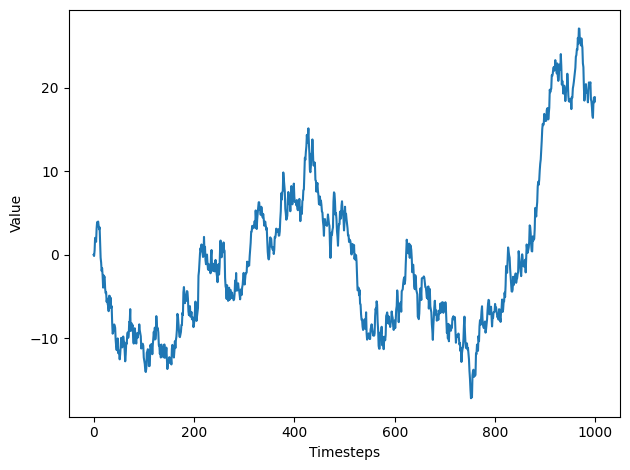

In [8]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")

plt.tight_layout()

## Identifying a random walk


A random walk is a series whose first difference is stationary and uncorrelated.
This means that the process moves completely at random.

## Stationarity
A stationary time series is one whose statistical properties do not change over time. In
other words, it has a constant mean, variance, and autocorrelation, and these proper-
ties are independent of time.

**Transformation in time series forecasting**

A transformation is a mathematical operation applied to a time series in order to
make it stationary.
Differencing is a transformation that calculates the change from one timestep to
another. This transformation is useful for stabilizing the mean.
Applying a log function to the series can stabilize its variance.

## Testing for stationarity

**Augmented Dickey-Fuller (ADF) test**

The augmented Dickey-Fuller (ADF) test helps us determine if a time series is station-
ary by testing for the presence of a unit root. If a unit root is present, the time series
is not stationary.
The null hypothesis states that a unit root is present, meaning that our time series
is not stationary.

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
ADF_result = adfuller(random_walk)
print(f"ADF statistc: {ADF_result[0]}")
print(f"p-value: {ADF_result[1]}")

ADF statistc: -0.965952487691875
p-value: 0.7654789696692581


## The autocorrelation function

**Autocorrelation function**

The autocorrelation function (ACF) measures the linear relationship between lagged
values of a time series.Here, the lag is simply the number of timesteps separating two values.
In other words, it measures the correlation of the time series with itself.

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

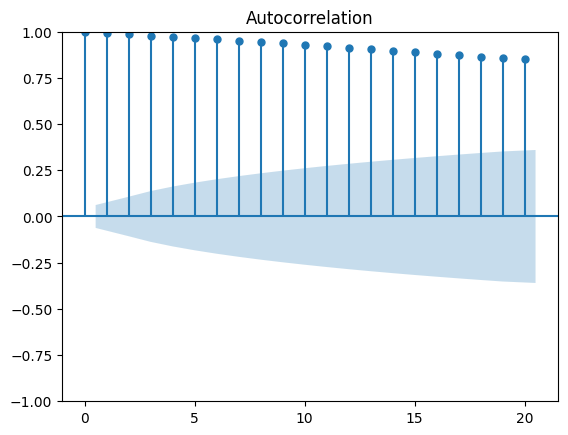

In [12]:
plot_acf(random_walk, lags=20);

## Differencing

In [13]:
diff_random_walk = np.diff(random_walk, n=1)

In [15]:
random_walk[:5]

array([ 0.        , -0.1382643 ,  0.50942424,  2.03245409,  1.79830072])

In [16]:
diff_random_walk[:5]

array([-0.1382643 ,  0.64768854,  1.52302986, -0.23415337, -0.23413696])

In [17]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.7893108575606
p-value: 0.0


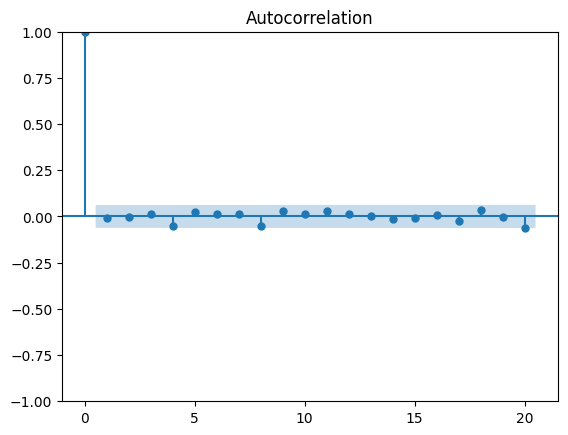

In [18]:
plot_acf(diff_random_walk, lags=20);

## Is GOOGL a random walk?

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("../data/GOOGL.csv")

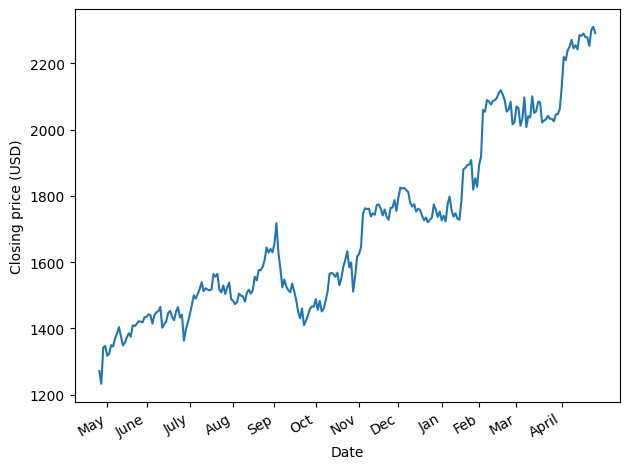

In [22]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
plt.xticks(
[4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', "Jan", 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

In [23]:
GOOGL_ADF_result = adfuller(df['Close'])
print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771266
p-value: 0.9699419435913057


In [24]:
diff_close = np.diff(df['Close'], n=1)

In [25]:
GOOGL_ADF_result = adfuller(diff_close)
print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: -5.303439704295233
p-value: 5.3865309614546085e-06


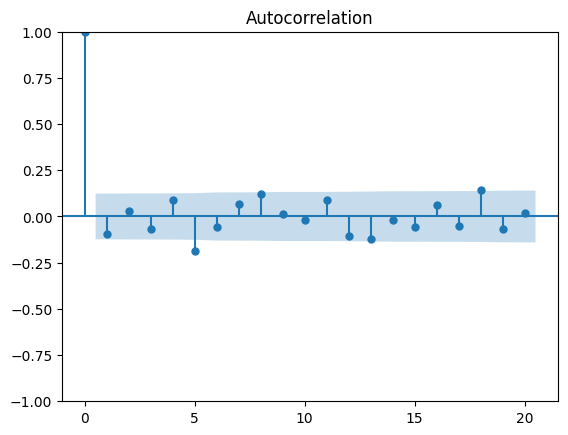

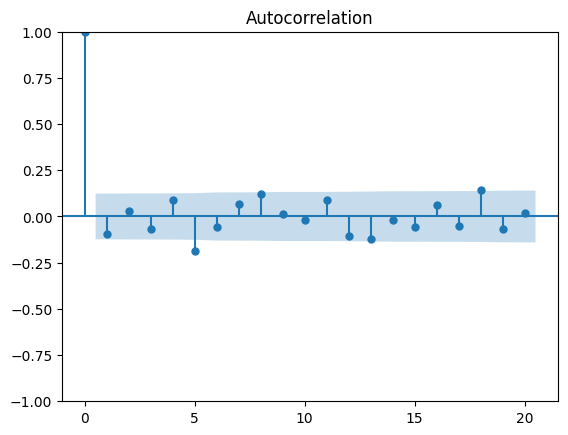

In [26]:
plot_acf(diff_close, lags=20)

## Forecasting a random walk

In [27]:
import pandas as pd
df = pd.DataFrame({'value': random_walk})
train = df[:800]
test = df[800:]

In [28]:
mean = np.mean(train.value)
test.loc[:, 'pred_mean'] = mean
test.head()

/tmp/ipykernel_63723/3058291559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = mean


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [29]:
last_value = train.iloc[-1].value
test.loc[:, 'pred_last'] = last_value
test.head()

/tmp/ipykernel_63723/2342727651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last_value


,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


In [30]:
deltaX = 800 - 1
deltaY = last_value - 0
drift = deltaY / deltaX
print(drift)

-0.008529346056640632


In [31]:
x_vals = np.arange(800, 1000, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift
test.head()

/tmp/ipykernel_63723/1412763259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_drift'] = pred_drift


,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.823477
801,-6.392708,-3.677206,-6.814947,-6.832006
802,-6.296588,-3.677206,-6.814947,-6.840536
803,-6.758863,-3.677206,-6.814947,-6.849065
804,-7.193359,-3.677206,-6.814947,-6.857594


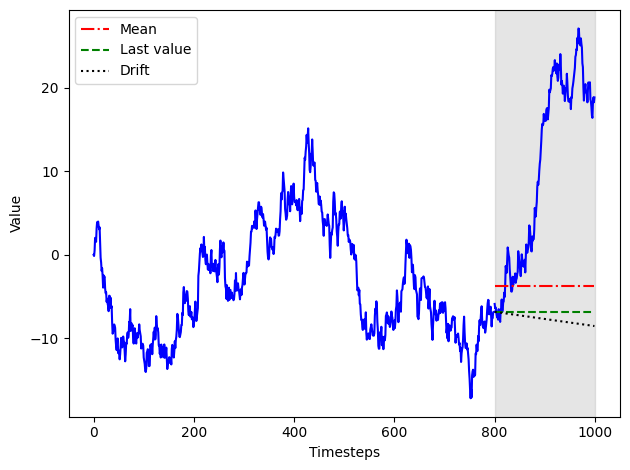

In [32]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

In [33]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])
print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 465.9076036601397


In [28]:
df_shift = df.shift(periods=1)
df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


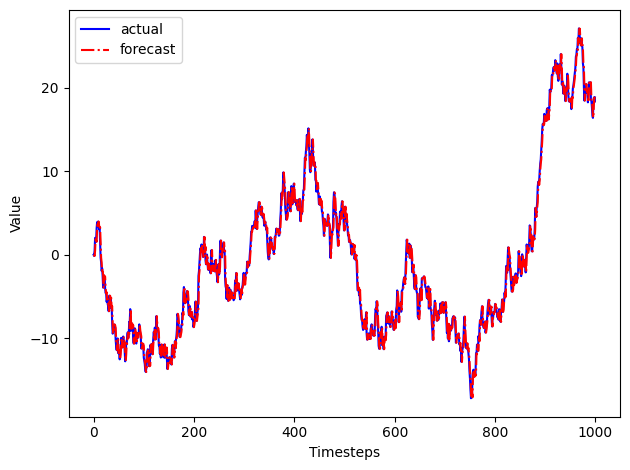

In [29]:
fig, ax = plt.subplots()
ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')
ax.legend(loc=2)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

In [30]:
mse_one_step = mean_squared_error(test['value'], df_shift[800:])
print(mse_one_step)

0.9256876651440581
